# Corrections to Weeks 6, 7, and 8
Team Members: Alejandro Soto Franco, Callie Jones, Daniel Labbe, and Samuel Bernstein

In this notebook, we will be correcting the code from the previous weeks. We will be using the same data as before, but we will be using the correct code to analyze it.

## **Week 6 Corrections**
For this week, we were asked to provide the citations for the incorrect ODEs. These citations do not exist; I (ASF) simply made a mistake when writing the ODEs. Our PK model includes an absorption compartment, a gastrointestinal (GI) compartment, a liver compartment, and a central compartment. The model describes the movement of a drug between these compartments and its elimination from the liver as described in Figure 9 of Chapter 7 of the course textbook.

- $V_A$: Volume of absorption compartment
- $V_{GI}$: Volume of GI compartment
- $V_L$: Volume of liver compartment
- $V_C$: Volume of central compartment
- $k_a$: First-order absorption rate constant
- $Q_{GI}$: Volumetric flow rate from the GI compartment to the liver and from the central compartment to the GI compartment
- $Q_L$: Volumetric flow rate from the liver to the central compartment and vice versa
- $k_e$: First-order elimination rate constant in the liver

The mass balance equations for each compartment are:
- $\frac{dM_A}{dt} = -k_a \cdot M_A$
- $\frac{dM_{GI}}{dt} = k_a \cdot M_A - \frac{Q_{GI}}{V_{GI}} \cdot M_{GI} + \frac{Q_{GI}}{V_C} \cdot M_C$
- $\frac{dM_L}{dt} = \frac{Q_{GI}}{V_{GI}} \cdot M_{GI} - \frac{(Q_L + Q_{GI})}{V_L} \cdot M_L + \frac{Q_L}{V_C} \cdot M_C - k_e \cdot M_L$
- $\frac{dM_C}{dt} = \frac{(Q_L + Q_{GI})}{V_L} \cdot M_L - \frac{(Q_L + Q_{GI})}{V_C} \cdot M_C$

The concentration balance equations, derived from the mass balance equations, are:
- $\frac{dC_A}{dt} = -k_a C_A$
- $\frac{dC_{GI}}{dt} = k_a C_A - Q_{GI} \frac{C_{GI}}{V_{GI}}$
- $\frac{dC_L}{dt} = \frac{(Q_{GI} C_{GI})}{V_L} - \frac{(Q_L + Q_{GI}) C_L}{V_L} + \frac{Q_L C_C}{V_L} - k_e C_L$
- $\frac{dC_C}{dt} = \frac{(Q_L + Q_{GI}) C_L}{V_C} - \frac{Q_L C_L}{V_C} - \frac{Q_{GI} C_C}{V_C}$

This way of writing the expressions makes the mass balance relationships explicit. I should note that these equations are different from (24-27) in Chapter 7. From this analysis, I have the strong suspicion that they are incorrect. For instance, $dC_{GI}/dt$ is written as $$\frac{dC_{GI}}{dt} = \frac{k_aC_AV_A}{V_{GI}} + \frac{Q_{GI}}{V_{GI}} (C_C - C_{GI}),$$ which clearly does not follow the mass balance of the drug moving from the absorption compartment into the GI compartment.

We can assume that $V_{GI}$ is 2L and $V_L$ is 1.5L, again from the textbook. The volume of the central compartment is given as $V_C = V_D - V_{GI} - V_L$, for which we can assume that $V_D$ is 72L, so $V_C$ is 68.5L. $Q_{GI}$ is 18 L/hr and $Q_L$ is 18 L/hr. We will consider a 600mg oral dose of acetaminophen, which has a terminal half-life of 2.5 hours. We will use $k_a$ = 0.5 $hr^{-1}$ and $k_e$ = 0.277 $hr^{-1}$.


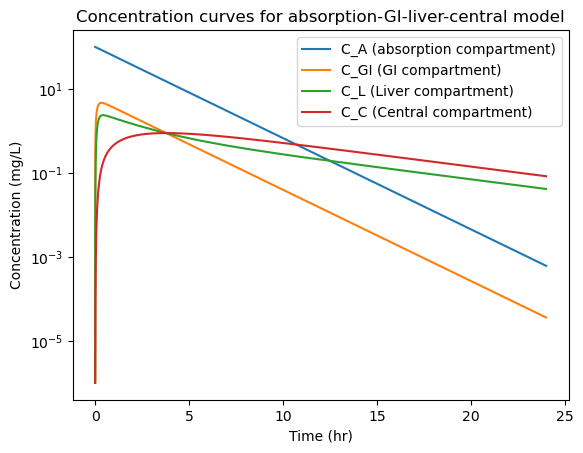

In [291]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the parameters
V_A = 1  # We assume a volume for the absorption compartment; this won't affect concentration profiles
V_GI = 2  # L
V_L = 1.5  # L
V_D = 72  # L
V_C = V_D - V_GI - V_L  # L
Q_GI = 18  # L/hr
Q_L = 18  # L/hr
k_a = 0.5  # /hr
k_e = 0.277 # /hr
dose = 100  # mg

# Initial concentrations (mg/L)
C_A0 = dose / V_A  # The initial condition for the absorption compartment is the dose divided by V_A
initial_conditions = [C_A0, 0, 0, 0]  # C_A, C_GI, C_L, C_C

# Time vector (24 hrs)
t = np.linspace(0, 24, 7500)

# System of ODEs
def model(t, y):
    C_A, C_GI, C_L, C_C = y
    dC_A_dt = -k_a * C_A
    dC_GI_dt = k_a * C_A - Q_GI * C_GI/V_GI
    dC_L_dt = (Q_GI * C_GI)/V_L - ((Q_L + Q_GI) * C_L)/V_L + (Q_L * C_C)/V_L - k_e * C_L
    dC_C_dt = (Q_L + Q_GI) * C_L/V_C - (Q_L * C_L)/V_C - (Q_GI * C_C)/V_C

    return [dC_A_dt, dC_GI_dt, dC_L_dt, dC_C_dt]

# Solve ODE
solution = solve_ivp(model, [t[0], t[-1]], initial_conditions, t_eval=t)
min_concentration = 1e-6
solution.y = np.maximum(solution.y, min_concentration)  # Set any negative concentrations to 0

# Plot the results
plt.plot(solution.t, solution.y[0], label='C_A (absorption compartment)')
plt.plot(solution.t, solution.y[1], label='C_GI (GI compartment)')
plt.plot(solution.t, solution.y[2], label='C_L (Liver compartment)')
plt.plot(solution.t, solution.y[3], label='C_C (Central compartment)')
plt.title('Concentration curves for absorption-GI-liver-central model')
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (mg/L)')
plt.yscale('log')
plt.legend()
plt.grid(False)
plt.show()


## Our Gallery of Phase Portraits
Despite our best efforts, we were still unable to push the C_L and C_C curves to 0. To understand the system behavior, we put together multiple phase portraits to show the relationship between the compartments.

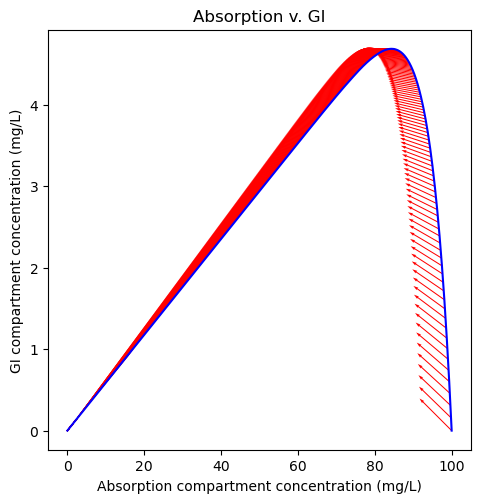

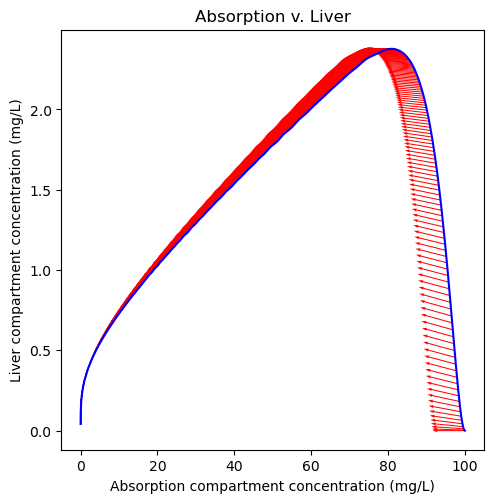

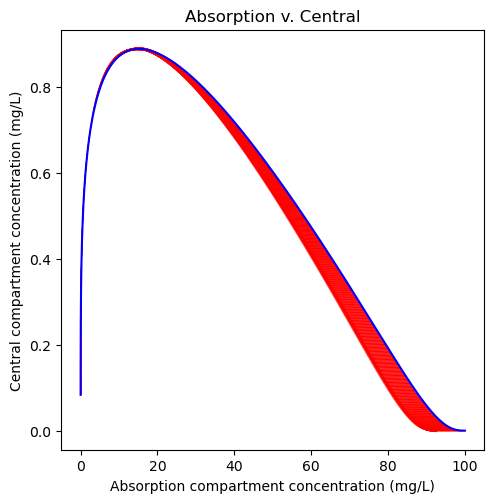

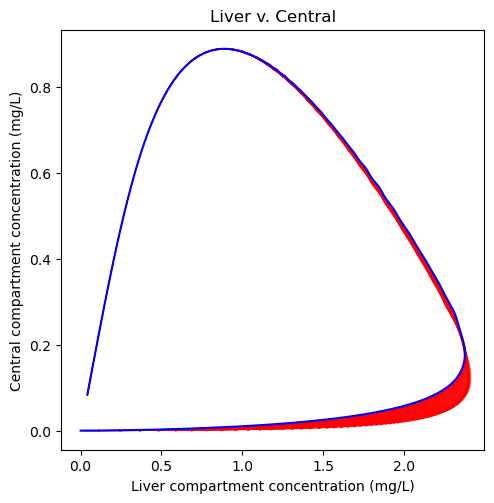

In [292]:
dy = model(t, solution.y)

# Normalize the arrows for better visualization
#N = sum(np.power(dy,2))
dA, dG, dL, dC = dy

# Creating the phase portraits, starting with absorption v. GI
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.quiver(solution.y[0], solution.y[1], dA, dG, color='red')
plt.plot(solution.y[0], solution.y[1], color='blue')
plt.xlabel('Absorption compartment concentration (mg/L)')
plt.ylabel('GI compartment concentration (mg/L)')
plt.grid(False)
plt.title("Absorption v. GI")
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(2,2,2)
plt.quiver(solution.y[0], solution.y[2], dA, dL, color='red')
plt.plot(solution.y[0], solution.y[2], color='blue')
plt.xlabel('Absorption compartment concentration (mg/L)')
plt.ylabel('Liver compartment concentration (mg/L)')
plt.grid(False)
plt.title("Absorption v. Liver")
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(2,2,3)
plt.quiver(solution.y[0], solution.y[3], dA, dC, color='red')
plt.plot(solution.y[0], solution.y[3], color='blue')
plt.xlabel('Absorption compartment concentration (mg/L)')
plt.ylabel('Central compartment concentration (mg/L)')
plt.grid(False)
plt.title("Absorption v. Central")
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(2,2,4)
plt.quiver(solution.y[2], solution.y[3], dL, dC, color='red')
plt.plot(solution.y[2], solution.y[3], color='blue')
plt.xlabel('Liver compartment concentration (mg/L)')
plt.ylabel('Central compartment concentration (mg/L)')
plt.grid(False)
plt.title("Liver v. Central")
plt.show()

## Understanding the Liver v. Central
The phase portraits indicates a path in concentration-time where it reperfuses through the liver multiple times ()

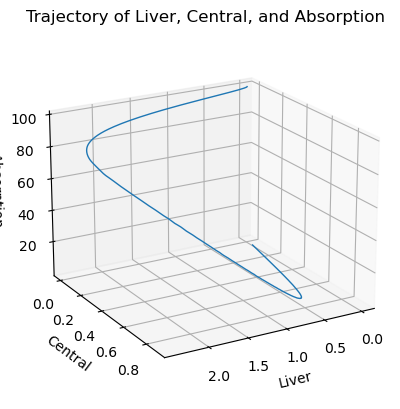

In [293]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = solution.y[2], solution.y[3], solution.y[0]
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs, lw=1)
ax.set_xlabel("Liver")
ax.set_ylabel("Central")
ax.set_zlabel("Absorption")
ax.set_title("Trajectory of Liver, Central, and Absorption")
ax.view_init(elev=20., azim=60, roll=0)
plt.show()

ax.plot(solution.t, solution.y[2])
plt.show()


In conclusion, it really does seem like the initial setup to this model is flawed and that the system is not stable. We are not sure how to fix this, but we are confident that the model is not correct.

## **Week 7 Corrections**
We made it clear where we got the parameters: Stuart-harris et al. (2000,https://doi.org/10.1046/j.1365-2125.2000.00141.x).

## **Week 8 Corrections**
This all seemed good!